In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import os,errno
import sys
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import pandas as pd
import datetime as dt
from scipy.ndimage.measurements import label
from math import sin, cos, sqrt, atan2, radians
import geopy.distance
%matplotlib inline

dir2='/thorncroftlab_rit/ahenny/rain/'
dir1='/thorncroftlab_rit/ahenny/rain/US/ghcnd_all/'
dir='/thorncroftlab_rit/ahenny/rain/DISSERTATION_SCRIPTS_RESULTS/'
#This script explored the timing of EP days, IVT, etc. within Mei-yu season

In [2]:
ds4=xr.open_dataset(dir+'taiwan_ep_days_stats_var95_newar.nc')
ar_yesno4=ds4['ar_yesno'].values.tolist()
ivt_yesno4=ds4['ivt_yesno'].values.tolist()
tc_yesno4=ds4['tc_yesno'].values.tolist()
other_yesno4=ds4['other_yesno'].values.tolist()
tc_linked_ar_yesno4=ds4['tc_linked_ar_yesno'].values.tolist()
tc_linked_ivt_yesno4=ds4['tc_linked_ivt_yesno'].values.tolist()
tc_remnant_linked_ivt_yesno4=ds4['ivt_tc_remnants_yesno'].values.tolist()
tc_remnant_ar_combo_yesno4=ds4['ar_tc_remnant_combo_yesno'].values.tolist()
tc_remnant_linked_ar_yesno4=ds4['tc_remnant_linked_ar_yesno'].values.tolist()
tc_remnants_yesno4=ds4['tc_remnants_yesno'].values.tolist()
tc_ar_combo_yesno4=ds4['tc_ar_combo_yesno'].values.tolist()

In [ ]:
ds=xr.open_dataset(dir+'ls_extreme_rain_taiwan.nc')
p=ds['large_scale_extreme_rain_all']#total rainfall on ER days
threshold=ds['threshold_99']
dates_unique=ds.large_scale_extreme_days.values
dates_unique=pd.DatetimeIndex(dates_unique)
print(dates_unique)

In [4]:
zipped_t1=list(zip(dates_unique,ar_yesno4))#ar-related = green
zipped_t2=list(zip(dates_unique,tc_linked_ar_yesno4))
zipped_t3=list(zip(dates_unique,tc_remnant_linked_ar_yesno4))
zipped_t4=list(zip(dates_unique,tc_yesno4))#tc-related = blue
zipped_t5=list(zip(dates_unique,tc_ar_combo_yesno4))
zipped_t6=list(zip(dates_unique,tc_remnant_ar_combo_yesno4))
zipped_t7=list(zip(dates_unique,tc_remnants_yesno4))
zipped_t8=list(zip(dates_unique,ivt_yesno4))#other IVT-related = grey
zipped_t9=list(zip(dates_unique,tc_linked_ivt_yesno4))
zipped_t10=list(zip(dates_unique,tc_remnant_linked_ivt_yesno4))
zipped_t11=list(zip(dates_unique,other_yesno4))#unspecified = brown

dates_t1=[x[0] for x in zipped_t1 if x[1]==1]
dates_t2=[x[0] for x in zipped_t2 if x[1]==1]
dates_t3=[x[0] for x in zipped_t3 if x[1]==1]
dates_t4=[x[0] for x in zipped_t4 if x[1]==1]
dates_t5=[x[0] for x in zipped_t5 if x[1]==1]
dates_t6=[x[0] for x in zipped_t6 if x[1]==1]
dates_t7=[x[0] for x in zipped_t7 if x[1]==1]
dates_t8=[x[0] for x in zipped_t8 if x[1]==1]
dates_t9=[x[0] for x in zipped_t9 if x[1]==1]
dates_t10=[x[0] for x in zipped_t10 if x[1]==1]
dates_t11=[x[0] for x in zipped_t11 if x[1]==1]

dates_t1=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t1]
dates_t2=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t2]
dates_t3=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t3]
dates_t4=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t4]
dates_t5=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t5]
dates_t6=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t6]
dates_t7=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t7]
dates_t8=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t8]
dates_t9=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t9]
dates_t10=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t10]
dates_t11=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t11]

In [5]:
yrs_neusa=np.arange(1979,2020,1)
t1_hist=[]
t2_hist=[]
t3_hist=[]
t4_hist=[]
t5_hist=[]
t6_hist=[]
t7_hist=[]
t8_hist=[]
t9_hist=[]
t10_hist=[]
t11_hist=[]
for i in range(47):
    date_range=[dt.datetime(1979+x,5,15,6)+dt.timedelta(days=i) for x in range(len(yrs_neusa))]
    num_t1=len([x for x in dates_t1 if x in date_range])
    num_t2=len([x for x in dates_t2 if x in date_range])
    num_t3=len([x for x in dates_t3 if x in date_range])
    num_t4=len([x for x in dates_t4 if x in date_range])
    num_t5=len([x for x in dates_t5 if x in date_range])
    num_t6=len([x for x in dates_t6 if x in date_range])
    num_t7=len([x for x in dates_t7 if x in date_range])
    num_t8=len([x for x in dates_t8 if x in date_range])
    num_t9=len([x for x in dates_t9 if x in date_range])
    num_t10=len([x for x in dates_t10 if x in date_range])
    num_t11=len([x for x in dates_t11 if x in date_range])

    t1_hist.append(num_t1)
    t2_hist.append(num_t2)
    t3_hist.append(num_t3)
    t4_hist.append(num_t4)
    t5_hist.append(num_t5)
    t6_hist.append(num_t6)
    t7_hist.append(num_t7)
    t8_hist.append(num_t8)
    t9_hist.append(num_t9)
    t10_hist.append(num_t10)
    t11_hist.append(num_t11)

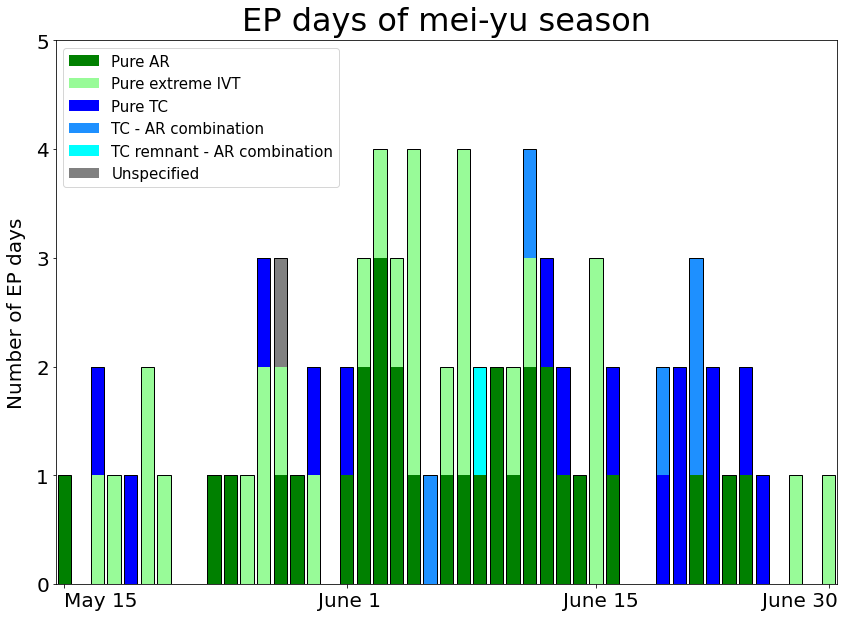

In [40]:
total_hist=[x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 in zip(t1_hist,t2_hist,
                                                                                            t3_hist,t4_hist,t5_hist,
                                                                                            t6_hist,t7_hist,t8_hist,
                                                                                            t9_hist,t10_hist,
                                                                                            t11_hist)]

fig=plt.figure(figsize=(14,10))
ax=plt.subplot(1,1,1)

ax.bar(np.arange(47),t1_hist,width=0.8,color='g',label='Pure AR')
ax.bar(np.arange(47),t8_hist,width=0.8,color='palegreen',bottom=t1_hist,label='Pure extreme IVT')

ax.bar(np.arange(47),t4_hist,width=0.8,color='b',bottom=[x+y for x,y in zip(t1_hist,t8_hist)],label='Pure TC')
ax.bar(np.arange(47),t5_hist,width=0.8,color='dodgerblue',bottom=[x+y+z for x,y,z in zip(t1_hist,t8_hist,t4_hist)],label='TC - AR combination')
ax.bar(np.arange(47),t6_hist,width=0.8,color='cyan',bottom=[x+y+z+w for x,y,z,w in zip(t1_hist,t8_hist,t4_hist,t5_hist)],label='TC remnant - AR combination')
ax.bar(np.arange(47),t11_hist,width=0.8,color='grey',bottom=[x+y+z+w+q for x,y,z,w,q in zip(t1_hist,t8_hist,t4_hist,t5_hist,t6_hist)],label='Unspecified')

ax.bar(np.arange(47),total_hist,width=0.8,color='None',edgecolor='k')

plt.legend(loc='upper left',fontsize=15)
ax.set_ylim(0,5)

ax.tick_params(labelsize=20)
ax.set_ylabel('Number of EP days',fontsize=20,labelpad=10)
ax.set_xlim(-0.5,46.5)
ax.set_title('EP days of mei-yu season',fontsize=32,pad=10)

#plt.xticks([0,17,17+15,46],labels=['May 15','June 1','June 15','June 30'],rotation=45)
plt.xticks([0,17,17+15,46],labels=['','','',''])
plt.text(0,-0.2,'May 15',fontsize=20)

plt.text(15.25,-0.2,'June 1',fontsize=20)
plt.text(30,-0.2,'June 15',fontsize=20)
plt.text(42,-0.2,'June 30',fontsize=20)

plt.show()


In [41]:
fig.savefig(dir+'taiwan_mys_seasonality.png')

In [42]:
yrs_neusa=np.arange(1979,2000,1)
t1_hist=[]
t2_hist=[]
t3_hist=[]
t4_hist=[]
t5_hist=[]
t6_hist=[]
t7_hist=[]
t8_hist=[]
t9_hist=[]
t10_hist=[]
t11_hist=[]
for i in range(47):
    date_range=[dt.datetime(1979+x,5,15,6)+dt.timedelta(days=i) for x in range(len(yrs_neusa))]
    num_t1=len([x for x in dates_t1 if x in date_range])
    num_t2=len([x for x in dates_t2 if x in date_range])
    num_t3=len([x for x in dates_t3 if x in date_range])
    num_t4=len([x for x in dates_t4 if x in date_range])
    num_t5=len([x for x in dates_t5 if x in date_range])
    num_t6=len([x for x in dates_t6 if x in date_range])
    num_t7=len([x for x in dates_t7 if x in date_range])
    num_t8=len([x for x in dates_t8 if x in date_range])
    num_t9=len([x for x in dates_t9 if x in date_range])
    num_t10=len([x for x in dates_t10 if x in date_range])
    num_t11=len([x for x in dates_t11 if x in date_range])

    t1_hist.append(num_t1)
    t2_hist.append(num_t2)
    t3_hist.append(num_t3)
    t4_hist.append(num_t4)
    t5_hist.append(num_t5)
    t6_hist.append(num_t6)
    t7_hist.append(num_t7)
    t8_hist.append(num_t8)
    t9_hist.append(num_t9)
    t10_hist.append(num_t10)
    t11_hist.append(num_t11)

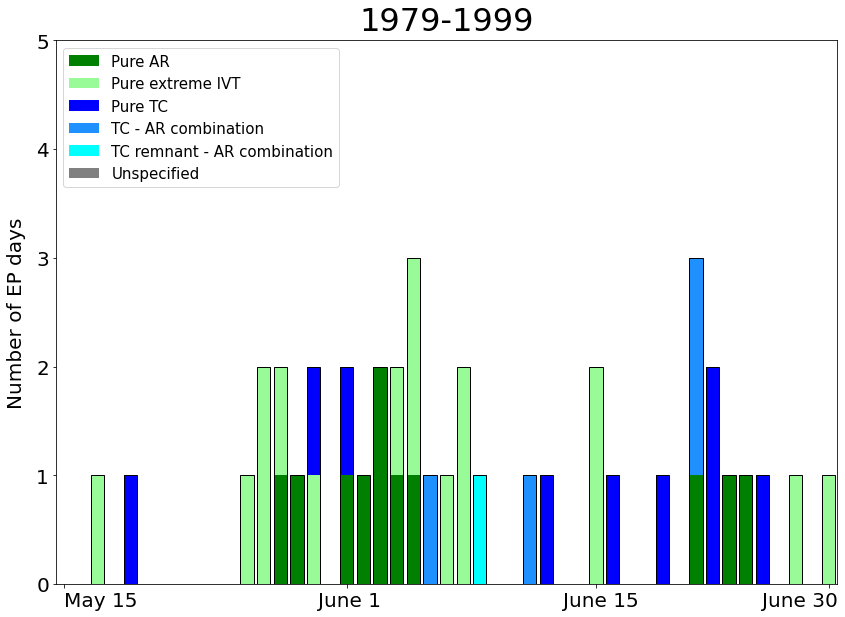

In [43]:
total_hist=[x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 in zip(t1_hist,t2_hist,
                                                                                            t3_hist,t4_hist,t5_hist,
                                                                                            t6_hist,t7_hist,t8_hist,
                                                                                            t9_hist,t10_hist,
                                                                                            t11_hist)]

fig=plt.figure(figsize=(14,10))
ax=plt.subplot(1,1,1)

ax.bar(np.arange(47),t1_hist,width=0.8,color='g',label='Pure AR')
ax.bar(np.arange(47),t8_hist,width=0.8,color='palegreen',bottom=t1_hist,label='Pure extreme IVT')

ax.bar(np.arange(47),t4_hist,width=0.8,color='b',bottom=[x+y for x,y in zip(t1_hist,t8_hist)],label='Pure TC')
ax.bar(np.arange(47),t5_hist,width=0.8,color='dodgerblue',bottom=[x+y+z for x,y,z in zip(t1_hist,t8_hist,t4_hist)],label='TC - AR combination')
ax.bar(np.arange(47),t6_hist,width=0.8,color='cyan',bottom=[x+y+z+w for x,y,z,w in zip(t1_hist,t8_hist,t4_hist,t5_hist)],label='TC remnant - AR combination')
ax.bar(np.arange(47),t11_hist,width=0.8,color='grey',bottom=[x+y+z+w+q for x,y,z,w,q in zip(t1_hist,t8_hist,t4_hist,t5_hist,t6_hist)],label='Unspecified')

ax.bar(np.arange(47),total_hist,width=0.8,color='None',edgecolor='k')

plt.legend(loc='upper left',fontsize=15)
ax.set_ylim(0,5)

ax.tick_params(labelsize=20)
ax.set_ylabel('Number of EP days',fontsize=20,labelpad=10)
ax.set_xlim(-0.5,46.5)
ax.set_title('1979-1999',fontsize=32,pad=10)

#plt.xticks([0,17,17+15,46],labels=['May 15','June 1','June 15','June 30'],rotation=45)
plt.xticks([0,17,17+15,46],labels=['','','',''])
plt.text(0,-0.2,'May 15',fontsize=20)

plt.text(15.25,-0.2,'June 1',fontsize=20)
plt.text(30,-0.2,'June 15',fontsize=20)
plt.text(42,-0.2,'June 30',fontsize=20)

plt.show()



In [44]:
fig.savefig(dir+'taiwan_mys_seasonality1.png')

In [45]:
yrs_neusa=np.arange(2000,2020,1)
t1_hist=[]
t2_hist=[]
t3_hist=[]
t4_hist=[]
t5_hist=[]
t6_hist=[]
t7_hist=[]
t8_hist=[]
t9_hist=[]
t10_hist=[]
t11_hist=[]
for i in range(47):
    date_range=[dt.datetime(2000+x,5,15,6)+dt.timedelta(days=i) for x in range(len(yrs_neusa))]
    num_t1=len([x for x in dates_t1 if x in date_range])
    num_t2=len([x for x in dates_t2 if x in date_range])
    num_t3=len([x for x in dates_t3 if x in date_range])
    num_t4=len([x for x in dates_t4 if x in date_range])
    num_t5=len([x for x in dates_t5 if x in date_range])
    num_t6=len([x for x in dates_t6 if x in date_range])
    num_t7=len([x for x in dates_t7 if x in date_range])
    num_t8=len([x for x in dates_t8 if x in date_range])
    num_t9=len([x for x in dates_t9 if x in date_range])
    num_t10=len([x for x in dates_t10 if x in date_range])
    num_t11=len([x for x in dates_t11 if x in date_range])

    t1_hist.append(num_t1)
    t2_hist.append(num_t2)
    t3_hist.append(num_t3)
    t4_hist.append(num_t4)
    t5_hist.append(num_t5)
    t6_hist.append(num_t6)
    t7_hist.append(num_t7)
    t8_hist.append(num_t8)
    t9_hist.append(num_t9)
    t10_hist.append(num_t10)
    t11_hist.append(num_t11)

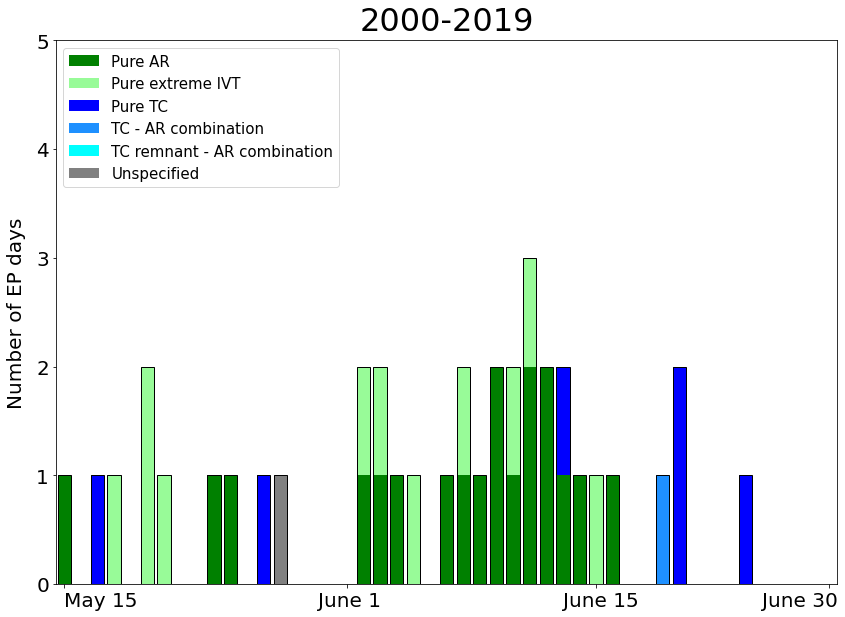

In [46]:
total_hist=[x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11 for x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 in zip(t1_hist,t2_hist,
                                                                                            t3_hist,t4_hist,t5_hist,
                                                                                            t6_hist,t7_hist,t8_hist,
                                                                                            t9_hist,t10_hist,
                                                                                            t11_hist)]

fig=plt.figure(figsize=(14,10))
ax=plt.subplot(1,1,1)

ax.bar(np.arange(47),t1_hist,width=0.8,color='g',label='Pure AR')
ax.bar(np.arange(47),t8_hist,width=0.8,color='palegreen',bottom=t1_hist,label='Pure extreme IVT')

ax.bar(np.arange(47),t4_hist,width=0.8,color='b',bottom=[x+y for x,y in zip(t1_hist,t8_hist)],label='Pure TC')
ax.bar(np.arange(47),t5_hist,width=0.8,color='dodgerblue',bottom=[x+y+z for x,y,z in zip(t1_hist,t8_hist,t4_hist)],label='TC - AR combination')
ax.bar(np.arange(47),t6_hist,width=0.8,color='cyan',bottom=[x+y+z+w for x,y,z,w in zip(t1_hist,t8_hist,t4_hist,t5_hist)],label='TC remnant - AR combination')
ax.bar(np.arange(47),t11_hist,width=0.8,color='grey',bottom=[x+y+z+w+q for x,y,z,w,q in zip(t1_hist,t8_hist,t4_hist,t5_hist,t6_hist)],label='Unspecified')

ax.bar(np.arange(47),total_hist,width=0.8,color='None',edgecolor='k')

plt.legend(loc='upper left',fontsize=15)
ax.set_ylim(0,5)

ax.tick_params(labelsize=20)
ax.set_ylabel('Number of EP days',fontsize=20,labelpad=10)
ax.set_xlim(-0.5,46.5)
ax.set_title('2000-2019',fontsize=32,pad=10)

#plt.xticks([0,17,17+15,46],labels=['May 15','June 1','June 15','June 30'],rotation=45)
plt.xticks([0,17,17+15,46],labels=['','','',''])
plt.text(0,-0.2,'May 15',fontsize=20)

plt.text(15.25,-0.2,'June 1',fontsize=20)
plt.text(30,-0.2,'June 15',fontsize=20)
plt.text(42,-0.2,'June 30',fontsize=20)

plt.show()



In [47]:
fig.savefig(dir+'taiwan_mys_seasonality2.png')

In [ ]:
yrs_neusa=np.arange(1979,2020,1)
arivt_freq_1=[]
arivt_freq_2=[]
for i in range(len(yrs_neusa)):
    date_range=[dt.datetime(yrs_neusa[i],6,1,6)+dt.timedelta(days=x) for x in range(7)]
    
    dates1=[x for x in dates_t1 if x in date_range]
    dates8=[x for x in dates_t8 if x in date_range]
    
    print(date_range)
    arivt_freq_1.append(len(dates1)+len(dates8))
for i in range(len(yrs_neusa)):
    date_range=[dt.datetime(yrs_neusa[i],6,8,6)+dt.timedelta(days=x) for x in range(7)]
    
    dates1=[x for x in dates_t1 if x in date_range]
    dates8=[x for x in dates_t8 if x in date_range]
    
    print(date_range)
    arivt_freq_2.append(len(dates1)+len(dates8))

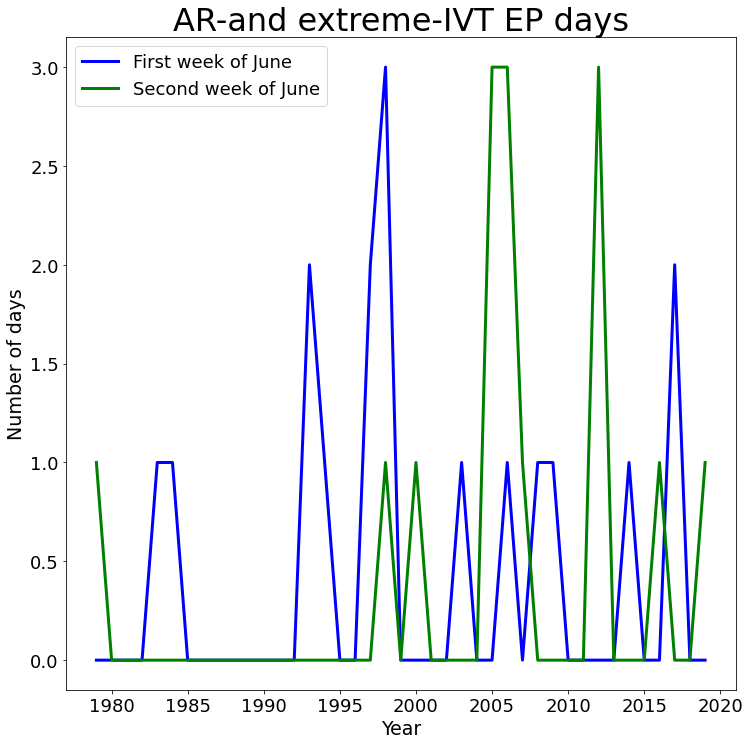

In [46]:
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)
ax.plot(yrs_neusa,arivt_freq_1,color='b',linewidth=3.0,label='First week of June')
ax.plot(yrs_neusa,arivt_freq_2,color='g',linewidth=3.0,label='Second week of June')
ax.tick_params(labelsize=18)
ax.set_title('AR-and extreme-IVT EP days',fontsize=32)
ax.set_xlabel('Year',fontsize=19)
ax.set_ylabel('Number of days',fontsize=19)
plt.legend(loc='upper left',fontsize=18)
plt.show()

In [47]:
fig.savefig(dir+'taiwan_timing_change_1.png')

In [ ]:
ds5=xr.open_dataset(dir+'taiwan_ar_climo_mys.nc')
print(ds5)
ar=ds5.ar
tc_trop=ds5.tc_trop
tc_nontrop=ds5.tc_nontrop
labeled=ds5['labeled']
print(ar.time)

lon_range_ar=np.arange(119.5,122.5,0.25)
lat_range_ar=np.arange(21.25,26,0.25)

In [ ]:
yrs_neusa=np.arange(1979,2020,1)
ar_freq_1=[]
ar_freq_2=[]
for i in range(len(yrs_neusa)):
    date_range=[dt.datetime(yrs_neusa[i],5,31,18)+dt.timedelta(hours=6*x) for x in range(7*4)]
    
    ar_select=ar.sel(time=date_range,latitude=lat_range_ar,longitude=lon_range_ar)
    ar_max=ar_select.max(dim=('latitude','longitude'))
    ar_sum=ar_max.sum(dim='time',skipna=True).values/4.#in days
    
    print(date_range)
    ar_freq_1.append(ar_sum)
for i in range(len(yrs_neusa)):
    date_range=[dt.datetime(yrs_neusa[i],6,7,18)+dt.timedelta(hours=6*x) for x in range(7*4)]
    
    ar_select=ar.sel(time=date_range,latitude=lat_range_ar,longitude=lon_range_ar)
    ar_max=ar_select.max(dim=('latitude','longitude'))
    ar_sum=ar_max.sum(dim='time',skipna=True).values/4.#in days
    
    print(date_range)
    ar_freq_2.append(ar_sum)

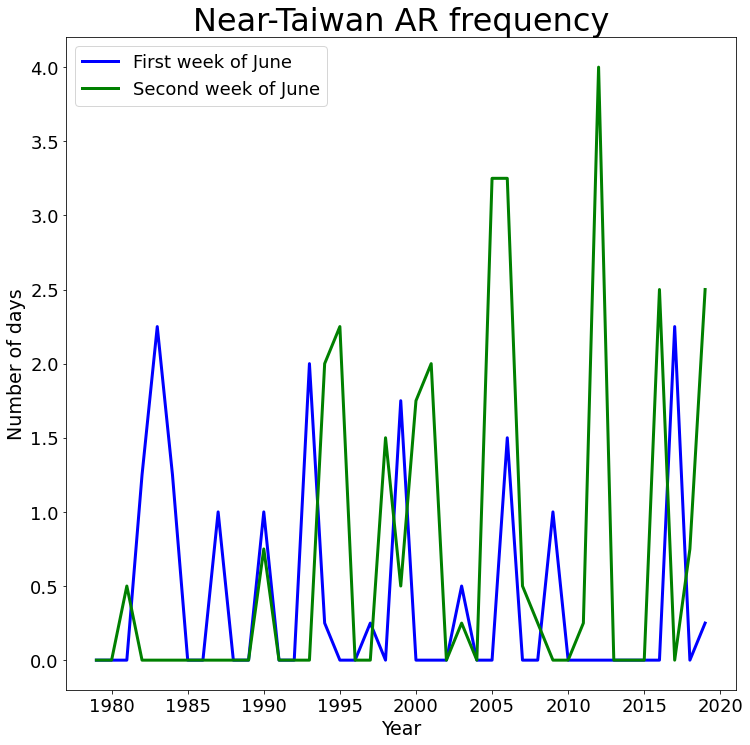

In [48]:
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)
ax.plot(yrs_neusa,ar_freq_1,color='b',linewidth=3.0,label='First week of June')
ax.plot(yrs_neusa,ar_freq_2,color='g',linewidth=3.0,label='Second week of June')
ax.tick_params(labelsize=18)
ax.set_title('Near-Taiwan AR frequency',fontsize=32)
ax.set_xlabel('Year',fontsize=19)
ax.set_ylabel('Number of days',fontsize=19)
plt.legend(loc='upper left',fontsize=18)
plt.show()

In [49]:
fig.savefig(dir+'taiwan_timing_change_2.png')

In [49]:
lon_range_ar=np.arange(119.5,122.5,0.25)
lat_range_ar=np.arange(21.25,26,0.25)

#lon_range_ar=np.arange(118,124,0.25)
#lat_range_ar=np.arange(20,27.25,0.25)

dw1=xr.open_dataset(dir+'era_5_mys_ivtx_taiwan.nc')
ivtx=dw1['p71.162'].sel(latitude=lat_range_ar,longitude=lon_range_ar)
dw2=xr.open_dataset(dir+'era_5_mys_ivty_taiwan.nc')
ivty=dw2['p72.162'].sel(latitude=lat_range_ar,longitude=lon_range_ar)

In [ ]:
print(ivtx)
yrs_neusa=np.arange(1979,2020,1)
ivt_1=[]
ivt_2=[]
ivt_3=[]
ivt_4=[]
ivt_5=[]
for i in range(len(yrs_neusa)):
    date_range=[dt.datetime(yrs_neusa[i],5,17,18)+dt.timedelta(hours=6*x) for x in range(7*4)]
    
    ivtx_select=ivtx.sel(time=date_range)
    ivty_select=ivty.sel(time=date_range)
    ivt_select=np.sqrt(ivtx_select**2+ivty_select**2)
    ivt_mean=ivt_select.mean(skipna=True).values
    ivt_1.append(ivt_mean)
    
for i in range(len(yrs_neusa)):
    date_range=[dt.datetime(yrs_neusa[i],5,24,18)+dt.timedelta(hours=6*x) for x in range(7*4)]
    
    ivtx_select=ivtx.sel(time=date_range)
    ivty_select=ivty.sel(time=date_range)
    ivt_select=np.sqrt(ivtx_select**2+ivty_select**2)
    ivt_mean=ivt_select.mean(skipna=True).values
    ivt_2.append(ivt_mean)
    
for i in range(len(yrs_neusa)):
    date_range=[dt.datetime(yrs_neusa[i],5,31,18)+dt.timedelta(hours=6*x) for x in range(7*4)]
    
    ivtx_select=ivtx.sel(time=date_range)
    ivty_select=ivty.sel(time=date_range)
    ivt_select=np.sqrt(ivtx_select**2+ivty_select**2)
    ivt_mean=ivt_select.mean(skipna=True).values
    ivt_3.append(ivt_mean)
    
for i in range(len(yrs_neusa)):
    date_range=[dt.datetime(yrs_neusa[i],6,7,18)+dt.timedelta(hours=6*x) for x in range(7*4)]
    
    ivtx_select=ivtx.sel(time=date_range)
    ivty_select=ivty.sel(time=date_range)
    ivt_select=np.sqrt(ivtx_select**2+ivty_select**2)
    ivt_mean=ivt_select.mean(skipna=True).values
    ivt_4.append(ivt_mean)
    
for i in range(len(yrs_neusa)):
    date_range=[dt.datetime(yrs_neusa[i],6,14,18)+dt.timedelta(hours=6*x) for x in range(7*4)]
    
    ivtx_select=ivtx.sel(time=date_range)
    ivty_select=ivty.sel(time=date_range)
    ivt_select=np.sqrt(ivtx_select**2+ivty_select**2)
    ivt_mean=ivt_select.mean(skipna=True).values
    ivt_5.append(ivt_mean)

In [53]:
#@author: Michael Schramm on GitHub
#This function is derived from code originally posted by Sat Kumar Tomer
#(satkumartomer@gmail.com)
#See also: http://vsp.pnnl.gov/help/Vsample/Design_Trend_Mann_Kendall.htm

from scipy.stats import norm
import scipy.stats as st
def mk_test(x, alpha=0.05):
    n = len(x)

    # calculate S
    s = 0
    for k in range(n-1):
        for j in range(k+1, n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x, tp = np.unique(x, return_counts=True)
    g = len(unique_x)

    # calculate the var(s)
    if n == g:  # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else:  # there are some ties in data
        var_s = (n*(n-1)*(2*n+5) - np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s > 0:
        z = (s - 1)/np.sqrt(var_s)
    elif s < 0:
        z = (s + 1)/np.sqrt(var_s)
    else: # s == 0:
        z = 0

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z)))  # two tail test
    h = abs(z) > norm.ppf(1-alpha/2)

    if (z < 0) and h:
        trend = 'decreasing'
    elif (z > 0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, h, p, z

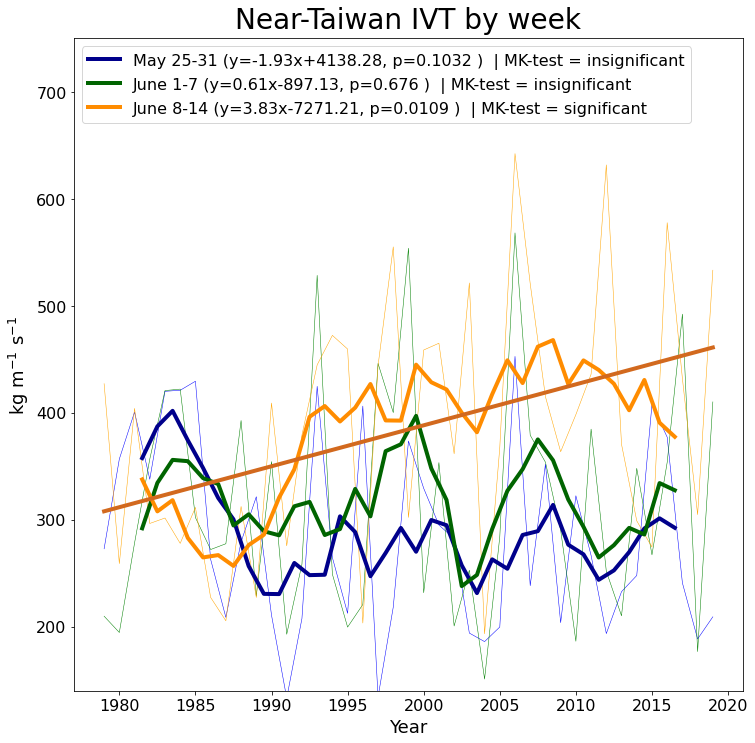

In [56]:
import scipy.stats as st
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)
#ax.plot(yrs_neusa,ivt_1,color='blueviolet',linewidth=0.5,label='May 18-25')
ax.plot(yrs_neusa,ivt_2,color='b',linewidth=0.5)
ax.plot(yrs_neusa,ivt_3,color='g',linewidth=0.5)
ax.plot(yrs_neusa,ivt_4,color='orange',linewidth=0.5)
#ax.plot(yrs_neusa,ivt_5,color='red',linewidth=0.5,label='June 15-22')

running_mean_1=[]
running_mean_2=[]
running_mean_3=[]
running_mean_4=[]
running_mean_5=[]
for i in range(len(yrs_neusa)-5):
    slice_1=ivt_1[i:i+5]
    slice_1_mean=float(sum(slice_1))/float(len(slice_1))
    running_mean_1.append(slice_1_mean)
    
    slice_2=ivt_2[i:i+5]
    slice_2_mean=float(sum(slice_2))/float(len(slice_2))
    running_mean_2.append(slice_2_mean)
    
    slice_3=ivt_3[i:i+5]
    slice_3_mean=float(sum(slice_3))/float(len(slice_3))
    running_mean_3.append(slice_3_mean)
    
    slice_4=ivt_4[i:i+5]
    slice_4_mean=float(sum(slice_4))/float(len(slice_4))
    running_mean_4.append(slice_4_mean)
    
    slice_5=ivt_5[i:i+5]
    slice_5_mean=float(sum(slice_5))/float(len(slice_5))
    running_mean_5.append(slice_5_mean)
    
linreg0=st.linregress(yrs_neusa,ivt_2)
slope0=linreg0[0]
intercept0=linreg0[1]
p_value0=linreg0[3]
mk0=mk_test(ivt_2,alpha=0.05)
if mk0[0] in ['increasing','decreasing']:
    mk0_str='MK-test = significant'
else:
    mk0_str='MK-test = insignificant'
if intercept0<0:
    eq_str0='y='+str(round(slope0,2))+'x-'+str(abs(round(intercept0,2)))+', p='+str(round(p_value0,4))+' ) '
else:
    eq_str0='y='+str(round(slope0,2))+'x+'+str(abs(round(intercept0,2)))+', p='+str(round(p_value0,4))+' ) '

linreg1=st.linregress(yrs_neusa,ivt_3)
slope1=linreg1[0]
intercept1=linreg1[1]
p_value1=linreg1[3]
mk1=mk_test(ivt_3,alpha=0.05)
if mk1[0] in ['increasing','decreasing']:
    mk1_str='MK-test = significant'
else:
    mk1_str='MK-test = insignificant'
if intercept1<0:
    eq_str1='y='+str(round(slope1,2))+'x-'+str(abs(round(intercept1,2)))+', p='+str(round(p_value1,4))+' ) '
else:
    eq_str1='y='+str(round(slope1,2))+'x+'+str(abs(round(intercept1,2)))+', p='+str(round(p_value1,4))+' ) '

linreg2=st.linregress(yrs_neusa,ivt_4)
slope2=linreg2[0]
intercept2=linreg2[1]
p_value2=linreg2[3]
mk2=mk_test(ivt_4,alpha=0.05)
if mk2[0] in ['increasing','decreasing']:
    mk2_str='MK-test = significant'
else:
    mk2_str='MK-test = insignificant'
if intercept2<0:
    eq_str2='y='+str(round(slope2,2))+'x-'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '
else:
    eq_str2='y='+str(round(slope2,2))+'x+'+str(abs(round(intercept2,2)))+', p='+str(round(p_value2,4))+' ) '



#ax.plot(np.arange(1979+2.5,2020-2.5,1),running_mean_1,color='purple',linewidth=3.0)
ax.plot(np.arange(1979+2.5,2020-2.5,1),running_mean_2,color='darkblue',linewidth=4.0,label='May 25-31 ('+eq_str0+' | '+mk0_str)
ax.plot(np.arange(1979+2.5,2020-2.5,1),running_mean_3,color='darkgreen',linewidth=4.0,label='June 1-7 ('+eq_str1+' | '+mk1_str)
ax.plot(np.arange(1979+2.5,2020-2.5,1),running_mean_4,color='darkorange',linewidth=4.0,label='June 8-14 ('+eq_str2+' | '+mk2_str)
#ax.plot(np.arange(1979+2.5,2020-2.5,1),running_mean_5,color='darkred',linewidth=3.0)

ax.plot(yrs_neusa,[slope2*x+intercept2 for x in yrs_neusa],color='chocolate',linewidth=4.0)
ax.set_ylim(140,750)

plt.legend(loc='upper left',fontsize=16)
ax.tick_params(labelsize=16)
ax.set_ylabel('kg m$^{-1}$ s$^{-1}$',fontsize=18,labelpad=5)
ax.set_xlabel('Year',fontsize=18,labelpad=5)
ax.set_title('Near-Taiwan IVT by week',fontsize=28,pad=10)
plt.show()

In [57]:
fig.savefig(dir+'taiwan_ivt_weekly.png')